In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


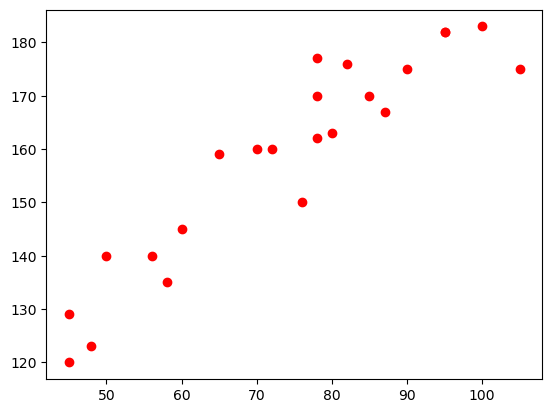

In [10]:
plt.scatter(df['Weight'],df['Height'],color='red')

In [11]:
#correlation
#relationship b/w x and y variables and states whether it's highly positive or not
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\Users\SAKSHAM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


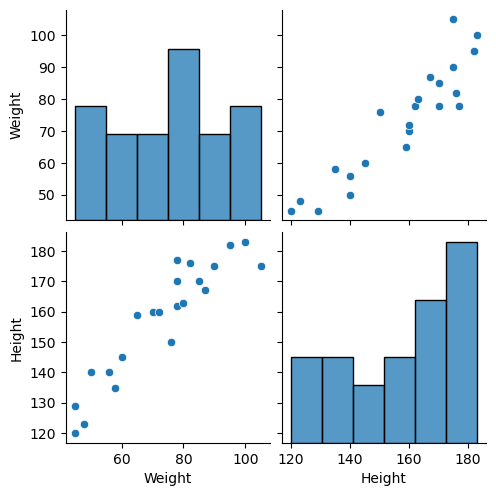

In [12]:
#visualizing through seaborn library
#e sns.pairplot() function in the Seaborn library is used for visualizing pairwise relationships in a dataset. 
import seaborn as sns
sns.pairplot(df)

In [13]:
#independent variable and dependent variable
X=df[['Weight']] # independent feature should be a dataframe of a 2d array only
#if we'll use X=df['Weight'] then it will have an error at some point and will be a series object.

y=df['Height']#dependent variable can be a series or a 1d array
np.array(X).shape #hence if we have more independent features then we will have more than 1 columns.

(23, 1)

In [14]:
#we are also testing if we choose a series independent object then what error we're gonna face at some point.
x_series=df['Weight']
np.array(x_series).shape

(23,)

In [15]:
y_series=df['Height']
np.array(y_series).shape

(23,)

In [16]:
from sklearn.model_selection import train_test_split


In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [80]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [81]:
# Importing the StandardScaler class from scikit-learn


# Creating an instance of the StandardScaler
# This instance will be used to scale the features in the training set
scaler = StandardScaler()
scaler.fit(X_train)
# Using the fit_transform method to compute mean and standard deviation
# of the features in X_train and standardize the features simultaneously
X_train= scaler.fit_transform(X_train)

# The result X_train_standardized is a standardized version of the training set
# where each feature has zero mean and unit variance

# It's important to note that the fit_transform method does two things:
# 1. It calculates the mean and standard deviation of each feature in X_train.
# 2. It applies the transformation to standardize the features based on the calculated mean and standard deviation.

# The same scaler instance should be used to transform other datasets (e.g., validation or test sets)
# to ensure that the mean and standard deviation used for scaling are consistent across all datasets.

# After scaling, X_train_standardized is ready to be used as input for machine learning models,
# especially those that benefit from standardized features, such as Support Vector Machines or
# regularized linear models like Ridge or Lasso regression.
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [82]:
# Using the transform method to apply the same scaling to the test set (X_test)
# This ensures that the scaling is consistent across the training and test sets
X_test = scaler.transform(X_test)

# The result X_test_standardized is a standardized version of the test set,
# where each feature has been transformed using the mean and standard deviation
# learned from the training set.

# It's crucial to use the same scaler instance that was fitted on the training set
# to ensure that the scaling parameters (mean and standard deviation) are consistent
# between the training and test sets.

# After scaling, X_test_standardized is ready to be used as input for machine learning models,
# alongside the standardized training set (X_train_standardized).
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
regression=LinearRegression(n_jobs=-1)
regression

LinearRegression(n_jobs=-1)

In [85]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [90]:
# Printing the coefficient or slope (theta1) value
# In simple linear regression, it represents the change in y for a unit change in x
print("Coefficient or slope:", regression.coef_)

# Printing the intercept (theta0) value
# It is the expected value of y when x is zero
print("Intercept:", regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


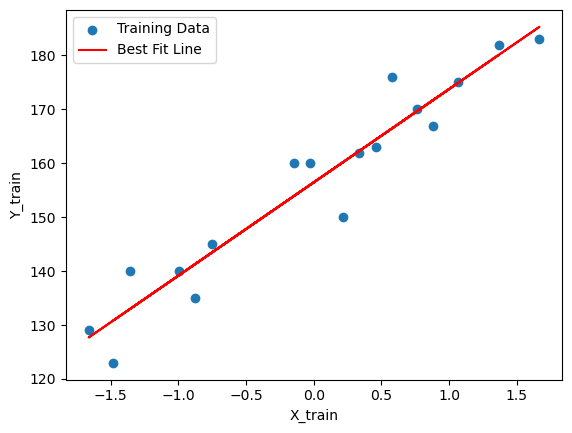

In [87]:

# Scatter plot of the training data
plt.scatter(X_train, Y_train, label='Training Data')

# Plotting the best-fit line predicted by the linear regression model
plt.plot(X_train, regression.predict(X_train), color='red', label='Best Fit Line')

# Adding labels and legend
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.legend()

# Display the plot
plt.show()

### Predicted Test Outputs
predicted high output=intercept+coefficient*(weights)

y_pred=156.47+17.29(X_test)

In [88]:
#predict the testing dataset
y_pred=regression.predict(X_test)
y_pred #predict all the testing data points value

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [89]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

9.665125886795005
114.84069295228699
10.716374991212605


### R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [91]:
from sklearn.metrics import r2_score

In [95]:
score=r2_score(Y_test,y_pred)
score

0.7360826717981276

### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [97]:
1-(1-score)*len(Y_test-1)/(len(Y_test)-X_test.shape[1]-1)

0.6041240076971914

In [98]:
#predicting uusing ols
import statsmodels.api as sm

In [102]:
model=sm.OLS(Y_train,X_train).fit()

In [105]:
pred=model.predict(X_test)
pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [108]:
model.summary()

C:\Users\SAKSHAM\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                       0.664
Time:                        02:12:59   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#Predicting new data points
regression.predict(scaler.transform([[69]]))

C:\Users\SAKSHAM\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([152.83367197])